In [4]:
!pip install pandas numpy matplotlib seaborn scipy scikit-learn

^C



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Clinical Data Exploration - Heart Disease 
**Author** Chloe Kamau

**Date:** 20-09-2025

**Objective:** Explore clinical predictors of heart disease using EDA and simple statistics

In [ ]:
# Imports & plot settings
import pandas as pd
import numpty as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats

# Plotting reference?

In [3]:
import pandas as pd 
df = pd.read_csv ("heart_disease_uci.csv")
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [5]:
df.shape

(920, 16)

Loaded dataset and checked the names (head) and shape of rows and columns
- most important columns: age, sex, cp, trestbps, chol, thalch.

In [ ]:
df.info()
df.describe()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

### Missing values & data types 
The dataset contains a mix of numeric ('int64', 'float64') and categorical ('object') data types 

Based on '.isma().sum()' output:

Columns with missing values:
* trestbps     59
* chol         30
* fbs          90
* restecg       2
* thalch       55
* exang        55
* oldpeak      62
* slope       309
* ca          611
* thal        486

Deciding whether to **fill** (impute) or **drop** these missing values dependant on level of missing data.

In [24]:
# Rename columns 
df = df.rename(columns= {'cp': 'chest_pain_type',
    'trestbps': 'resting_bp',
    'chol': 'cholesterol',
    'fbs': 'fasting_blood_sugar',
    'restecg': 'rest_ecg',
    'thalch': 'max_heart_rate',
    'exang': 'exercise_angina',
    'num': 'target'})


## Data Cleaning 
- (1) column renaming and (2) categorical variables 

1. I renamed some of the dataset columns for readibility and reference for analysis 
2. The 'sex' column, I kept as a categorical variable ('male','female') instead of converting them to binary (0/1) for better interpretation of plots and statistics.
* Would use binary encoding (shown below) for machine learning tasks, but in EDA, categorical labels are preferred.

```
df['sex]= df['sex'].map({1:'male', 0:'female'})
```

Matplotlib is building the font cache; this may take a moment.


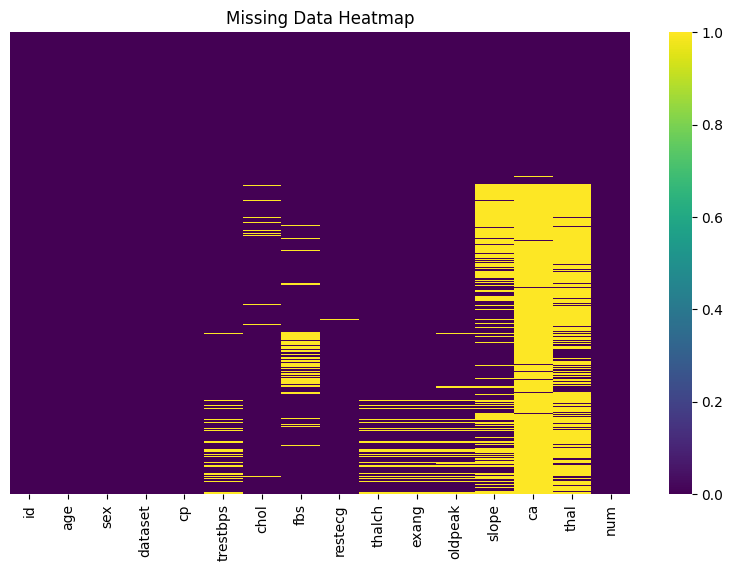

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
# Visualise missing data 

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

## Visualisation

Heat map to visualise which columns that have excessive missing data 

### Decision 
**Dropped columns**: 'slope', 'ca', 'thal' (>30% missing)
**Imputed columns**: Remaining columns with <10% missing data

In [31]:
# 1. Drop excessive missing data columns
df_clean = df.drop(['ca', 'thal', 'slope'], axis=1)

# 2. Fill numeric columns with median 
df_clean = df_clean.fillna({
    'resting_bp': df_clean['resting_bp'].median(),
    'cholesterol': df_clean['cholesterol'].median(),
    'max_heart_rate': df_clean['max_heart_rate'].median(),
    'oldpeak': df_clean['oldpeak'].median()})

# 3. Fill categorical columns with mode
df_clean = df_clean.fillna({
    'fasting_blood_sugar': df_clean['fasting_blood_sugar'].mode()[0],
    'rest_ecg': df_clean['rest_ecg'].mode()[0],
    'exercise_angina': df_clean['exercise_angina'].mode()[0]})

df_clean.isnull().sum()




C:\Users\user\AppData\Local\Temp\ipykernel_24820\3589977042.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean = df_clean.fillna({


id                     0
age                    0
sex                    0
dataset                0
chest_pain_type        0
resting_bp             0
cholesterol            0
fasting_blood_sugar    0
rest_ecg               0
max_heart_rate         0
exercise_angina        0
oldpeak                0
target                 0
dtype: int64

## Handling Missing Data

**Original dataset:** (920,16)  
**Final dataset:** *(920,13)
### Strategy
1. **Drop columns** with excessive missing data (>30%): 'ca', 'thal', 'slope'
2. **Impute remaining columns** individually:
   - Numeric columns: median imputation
   - Categorical columns: mode imputation

### Reasoning
- Dropping columns with too much missing data avoids unreliable results
- Imputing remaining columns preserves all 920 rows for analysis
- Using median for numbers and mode for categories is standard practice

### Visualising age and target distribution

These plots will give an initial understanding of the dataset’s composition:
* Who is represented 
* How the target (heart disease severity) is distributed.

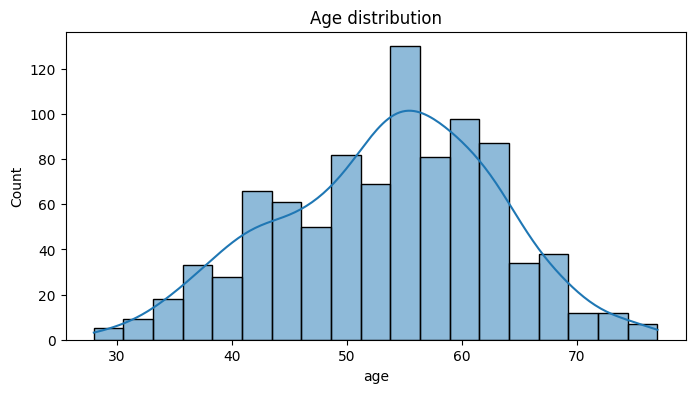

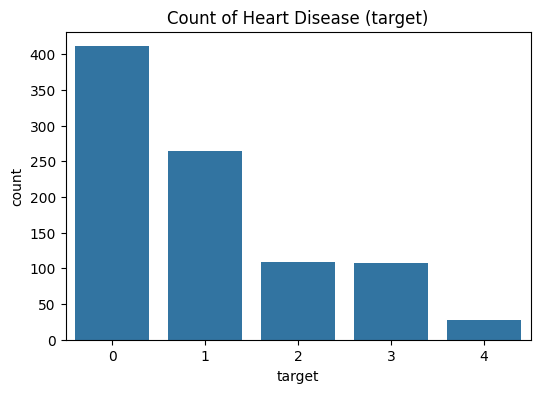

In [32]:
import os
os.makedirs('visuals', exist_ok=True)

# Age distribution 
plt.figure(figsize=(8,4))
sns.histplot(df_clean['age'], kde=True)
plt.title('Age distribution')
plt.savefig('visuals/age_distribution.png', dpi=200, bbox_inches='tight')
plt.show()

# Target counts
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df_clean)
plt.title('Count of Heart Disease (target)')
plt.savefig('visuals/target_counts.png', dpi=200, bbox_inches='tight')
plt.show()

1. The histogram of `age` displays a roughly **bell-shaped (normal) distribution**, with most participants between **50–60 years old**.
This shows that the dataset is mainly composed of **middle-aged adults**, which aligns with the age range typically associated with higher heart disease risk.


2. The `target` variable represents the presence or severity of heart disease :
* 0 = No heart disease
* 1-4 = Increasing levels of heart disease severity

The bar chart shows that most individuals (400+) in the dataset fall under **target =0**
As the target value increases (indicating more severe conditions), the number of cases decreases significantly.

Dataset is **imbalanced**, with more healthy individuals than patients with heart disease. 



### Cholesterol levels by heart disease severity 
After exploring the age distribution and identifying most paeople with heart disease are between 50-60 years old, next step is to investigate a different cardiovascular risk factor - **cholesterol**

Will use a box plot to compare `cholesterol` levels across different heart disease severity (`target`).
* This will help determine if individuals with heart disease (1,2,3,4) tend to have high cholesterol. 

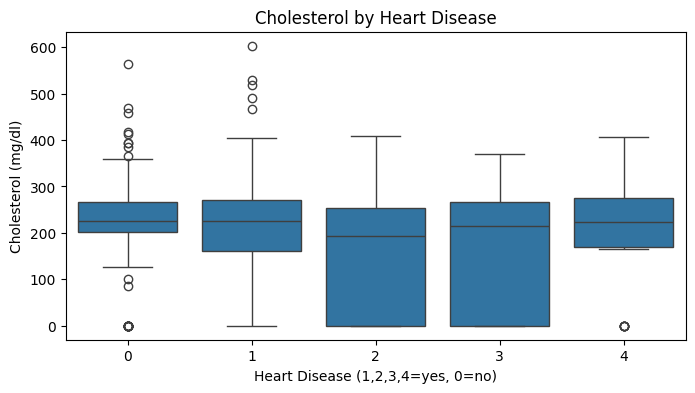

In [34]:
# Cholesterol v target 
plt.figure(figsize=(8,4))
sns.boxplot(x='target', y='cholesterol', data=df_clean)
plt.title('Cholesterol by Heart Disease')
plt.xlabel('Heart Disease (1,2,3,4=yes, 0=no)')
plt.ylabel('Cholesterol (mg/dl)')
plt.savefig('visuals/cholesterol_by_target.png', dpi=200, bbox_inches='tight')
plt.show()

Each box: Represents the cholesterol distribution for each group
The line inside the box: Median cholesterol (middle value)
Circles above the box: Outliers - people with unusually high cholesterol levels 

Prticipants with heart disease (target = 1-4), show a tendency towards higher cholesterol levels compared to those without heart disease(target=0)
There is substantial overlap between groups, suggesting that cholesterol alone is **not a strong predictor** of heart diseas in this dataset.
Several outliers with very high cholesterol (>400 mg/dL) indicates extreme lipid levels in certain individuals 
- In all, high cholesterol contributes to cardiovascular risk, but the risk interacts with other clinical and lifestyle factors so should not look at this alone. 

## Group Statistics

To better understand how key health indicators differ between people with and without heart disease, will calculate group statistics.
- This helps summarise the average age, cholesterol levels and other variables across the different heart disease categories, providing a clearer overall picture beyond individual plots. 

In [47]:
#Group statistics 
group_stats = df_clean.groupby('target').agg({
    'age':['mean', 'std'],
    'cholesterol':['mean', 'std'],
    'resting_bp':['mean', 'std']
}).round(1)

print(group_stats)

         age      cholesterol        resting_bp      
        mean  std        mean    std       mean   std
target                                               
0       50.5  9.4       227.7   74.1      129.9  16.5
1       53.5  8.7       196.0  122.6      132.7  19.4
2       57.6  7.8       145.3  130.8      133.3  16.7
3       59.2  8.0       160.3  126.4      135.3  23.1
4       59.2  8.3       193.2  114.6      137.8  21.1


From group summary can see that:
Individuals with higher heart disease tend to have **slightly higher cholesterol and blood pressure on avg**
* = aligns with medical expectations as both are known risk factors for heart disease 

Age distribution also **slightly higher** in heart disease 
* = suggests risk increases with age 

## Statistical Test

To check whether the observed differences in cholesterol (and other features) across heart disease groups are statistically significant, I will perform a one-way ANOVA test.
* This test compares the mean cholesterol levels between the target groups (0-4) to see if at least one differs significantly from the others.

### Why I chose one-way ANOVA over other statistical tests:

* **T-test**: Would only compare *two* groups at a time (e.g., heart disease vs no heart disease), which is not appropriate here since there are multiple severity levels (0-4).
* **Chi-square test**: Used for categorical (non-numeric) data, whereas cholesterol is a continuous numerical variable.


In [48]:
from scipy import stats

# Test significance in clinically relevant variables
variables_to_test = ['age', 'cholesterol', 'resting_bp', 'max_heart_rate']

print("ANOVA Results - Testing differences across heart disease severity:\n")
for var in variables_to_test:
    groups = [df_clean[df_clean['target'] == i][var].dropna() for i in df_clean['target'].unique()]
    f_stat, p_value = stats.f_oneway(*groups)
    print(f"{var}: F-statistic = {f_stat:.3f}, P-value = {p_value:.4f}")
    if p_value < 0.05:
        print(f"  → Significant difference found! (p < 0.05)\n")
    else:
        print(f"  → No significant difference (p ≥ 0.05)\n")

ANOVA Results - Testing differences across heart disease severity:

age: F-statistic = 31.226, P-value = 0.0000
  → Significant difference found! (p < 0.05)

cholesterol: F-statistic = 18.437, P-value = 0.0000
  → Significant difference found! (p < 0.05)

resting_bp: F-statistic = 3.123, P-value = 0.0145
  → Significant difference found! (p < 0.05)

max_heart_rate: F-statistic = 42.141, P-value = 0.0000
  → Significant difference found! (p < 0.05)



## ANOVA Results

All tested variables show **statistically significant differences** across heart disease severity levels (p < 0.05):

* **Age**: F = 31.23, p < 0.001 - Strong evidence that age differs by disease severity
* **Cholesterol**: F = 18.44, p < 0.001 - Cholesterol levels vary significantly across groups
* **Resting Blood Pressure**: F = 3.12, p = 0.015 - Weakest but still significant difference
* **Max Heart Rate**: F = 42.14, p < 0.001 - Largest F-statistic and very small p-value, shows clear differences between severity levels

Overall:
This suggests that as heart disease becomes more severe, patients tend to:
* Be older
* Have higher cholesterol levels
* Have a slightly higher resting blood pressure
* Achieve a lower maximum heart rate during exercise 

**Max heart rate** shows the strongest effect (highest F-statistic), suggesting it may be one of the most important features for distinguishing between disease severity levels.

#### These results indicate that all four variables are **significantly associated with heart disease severity** and could be valuable predictors in a classification model. The low p-values (especially for age, cholesterol, and max heart rate) suggest these differences are unlikely due to chance.

## Conclusion and Limitations

### Conclusion

This exploratory data analysis examined clinical and lifestyle factors associated with heart disease using the UCI Heart Disease dataset. 
Key findings include:

* **Age and heart disease**: Individuals with heart disease tended to be older, with most cases clustering between ages 50–60.
* **Cholesterol**: Higher cholesterol levels were observed among patients with more severe heart disease.
* **Resting blood pressure**: Slight increases in resting blood pressure were associated with heart disease, though the relationship was weaker.
* **Maximum heart rate**: Those with heart disease achieved lower maximum heart rates, consistent with reduced cardiovascular fitness.

Statistical testing using **one-way ANOVA** confirmed that these differences were statistically significant (p < 0.05) across all four variables, with maximum heart rate showing the strongest effect (F = 42.14), meaning meaningful variation in these risk factors with disease severity.



### Limitations

* The dataset size is relatively small (920 observations), limiting how confidently results can generalise to larger populations.
* Missing data required imputation and dropping, which may introduce bias into the results.
* Some features (e.g., cholesterol or blood pressure values) may be influenced by measurement differences or missing clinical context.
* The data is cross-sectional, so it cannot establish cause and effect — only associations.
* Potential confounding variables (such as medication use, diet, or physical activity) are not included.
* The severity of heart disease (target) is represented as a numeric category (0-4) rather than precise medical diagnoses, simplifying a complex clinical spectrum.



### Overall Summary

Despite these limitations, the analysis successfully demonstrates how exploratory data analysis (EDA) and statistical testing can reveal meaningful clinical patterns within biomedical data. The findings provide a solid foundation for more advanced predictive modeling (e.g. machine learning classification) in future work.